<a id='intro'></a>
## Introduction

### Dataset Description 

I choose TMDb movie data to analyze. It was chosen based on my preference for movies.

This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including information about:
    + id
    + imdb_id
    + poplularity
    + budget
    + revenue
    + original_title
    + cast
    + homepage
    + director
    + tagline
    + keyworks
    + overview
    + runtime
    + genres
    + production_companies
    + genres
    + nies
    + release_date
    + vote_count
    + vote_average
    + release_year
    + budget_adj
    + revenue_adj

### Question(s) for Analysis

For the first question, I want to know what is the average length of movies.

Second, What is the average budget for making films per year?

Third, How many movies are made each year?

And last, I am curious about the ratio between revenue and budget. What is the difference between revenue - budget? And how many movies have revenue - budget > budget? Does this ratio depend on the release_year or not?



In [29]:
# Import neccessary libs
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

- Drop Extraneous Columns
    With my questions I want to find answers, I will focus on some main columns: budget, revenue, release_year, genres.
    
    I will keep them and some more necessary pieces of information: id, imdb_id, original_title, cast, runtime, and production_companies.
    
- Drop Nulls
- Drop any duplicate rows in both datasets
- Check types of data
- Clean data Os in revenue, budget, and runtime

In [30]:
# Load datasets
movies_df = pd.read_csv('tmdb-movies.csv')
# View dimensions of datasets
movies_df.shape

(10866, 21)


### Data Cleaning
 

In [31]:
# Drop colums unnecessary
redundant_cols = ['popularity', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'release_date', 'vote_count', 'vote_average', 'budget_adj', 'revenue_adj']

movies_df.drop(redundant_cols, axis=1, inplace=True)

# Make sure drop ok
movies_df.head(1)

,id,imdb_id,budget,revenue,original_title,cast,runtime,genres,production_companies,release_year
0,135397,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015


In [32]:
# Count the number of duplicates
num_duplicates = movies_df.duplicated().sum()

# Remove duplicated datasets if have
if(num_duplicates > 0):
    movies_df.drop_duplicates(inplace=True)

In [33]:
# View the number of data NULL
movies_df.isnull().sum()

id                         0
imdb_id                   10
budget                     0
revenue                    0
original_title             0
cast                      76
runtime                    0
genres                    23
production_companies    1030
release_year               0
dtype: int64

In [34]:
# Drop rows have data NULL
movies_df.dropna(inplace=True)

# Check still have NULL or not
movies_df.isnull().sum().any()

False

In [35]:
# Function clean data value is  0s
def clean_zero_value(file_name):
    for col in file_name.columns:
        if file_name[col].dtype == 'int64':
            file_name.drop(file_name.loc[file_name[col]==0].index, inplace=True)
clean_zero_value(movies_df)

In [36]:
# Clean data Os in revenue, budget, and runtime
clean_zero_value(movies_df)

In [37]:
# Check types of datasets
movies_df.dtypes

id                       int64
imdb_id                 object
budget                   int64
revenue                  int64
original_title          object
cast                    object
runtime                  int64
genres                  object
production_companies    object
release_year             int64
dtype: object

In [38]:
# function change from object type to string type
def change_type_from_object_to_string(file_name):
    for col in file_name.columns:
        if file_name.dtypes[col] == object:
            file_name[col] = movies_df[col].astype('string')
            print(col) 

In [39]:
# Change from object type to string type
change_type_from_object_to_string(movies_df)

# Check type of data after changed
movies_df.dtypes

imdb_id
original_title
cast
genres
production_companies


id                       int64
imdb_id                 string
budget                   int64
revenue                  int64
original_title          string
cast                    string
runtime                  int64
genres                  string
production_companies    string
release_year             int64
dtype: object

In [40]:
# Save new datasets to the new file
movies_df.to_csv('movies_info.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

> **Tip**: Now that you've trimmed and cleaned your data, you're ready to move on to exploration. **Compute statistics** and **create visualizations** with the goal of addressing the research questions that you posed in the Introduction section. You should compute the relevant statistics throughout the analysis when an inference is made about the data. Note that at least two or more kinds of plots should be created as part of the exploration, and you must  compare and show trends in the varied visualizations. 



> **Tip**: - Investigate the stated question(s) from multiple angles. It is recommended that you be systematic with your approach. Look at one variable at a time, and then follow it up by looking at relationships between variables. You should explore at least three variables in relation to the primary question. This can be an exploratory relationship between three variables of interest, or looking at how two independent variables relate to a single dependent variable of interest. Lastly, you  should perform both single-variable (1d) and multiple-variable (2d) explorations.


### Research Question 1 (I want to know what is average length of movies?)

In [41]:
# Read data frame
df = pd.read_csv('movies_info.csv')

# Caculate the average time
average_time = df.runtime.mean()
average_time

109.36258539148713

Text(0.5, 1.0, 'Average runtime')

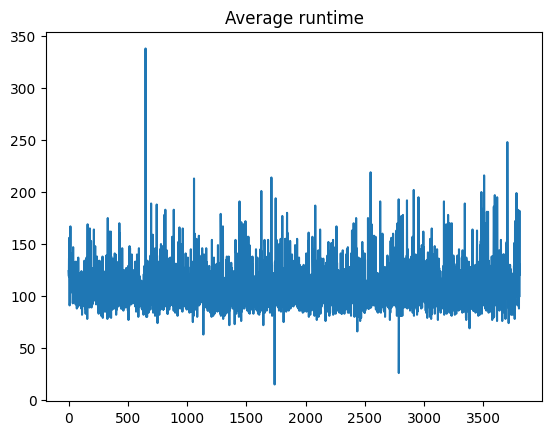

In [53]:
# Visualization
plt.plot(df['runtime'])
plt.title('Average runtime')

# Evaluates:
 - The average time is almost 2 hours. It's been a pretty good time for movies.

### Research Question 2  (What is the average of budget for make film per year?)

In [43]:
# get the budget per year
budget_per_year = df.groupby('release_year', as_index=False)['budget'].mean()

Text(0, 0.5, 'Average of budget')

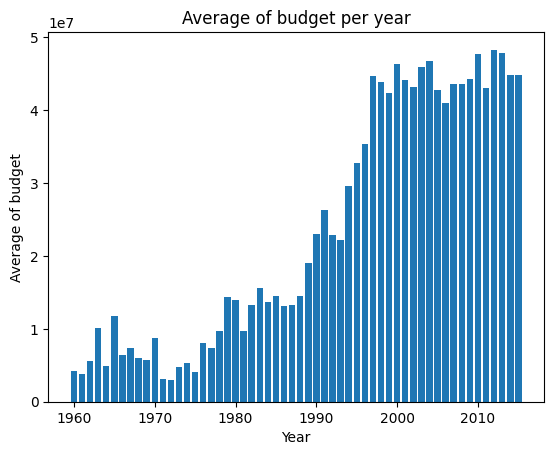

In [44]:
# Draw visualizations
plt.bar(budget_per_year['release_year'], budget_per_year['budget'])
plt.title('Average of budget per year')
plt.xlabel('Year')
plt.ylabel('Average of budget')

# Evaluates:
 - The time around 2000 was the most time have highest investment.
 - The film industry is developing compared to before.
 - In recent years, the level of investment has remained at a well.

### Research Question 3  (How many movies maked in each years?)

In [45]:
# Read the number of movies made each years
number_of_movies = df.groupby('release_year', as_index=False)['id'].count()

Text(0, 0.5, 'The number of movies')

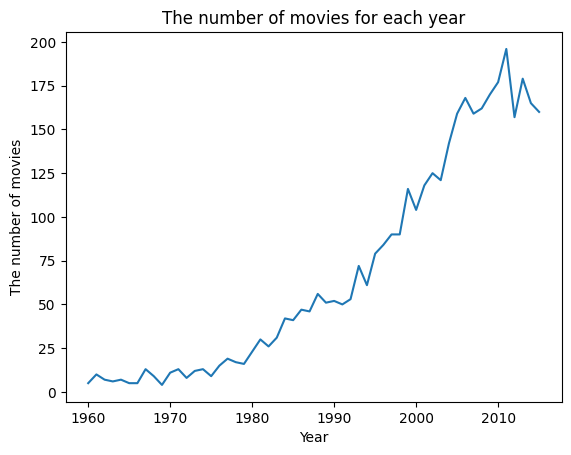

In [46]:
# Draw visualizations
plt.plot(number_of_movies['release_year'], number_of_movies['id'])
plt.title('The number of movies for each year')
plt.xlabel('Year')
plt.ylabel('The number of movies')

# Evaluates:
 - The number of movies increasing alot.
 - More than 600 is a highest number of movies made in one year.
 - Through the number of films, the development of the film industry can be seen.
 - The histogram slopes to the left

### Research Question 4  (What is the difference of revenue / budget? And how many movies have revenue - budget > budget? Does this ratio depens on the release_year or not?)

In [47]:
# Caculate revenue/budget
var_ratio=df.revenue - df.budget

# Create a new column for ratio
df['ratio'] = var_ratio

# Check the new column
df.head(1)

,id,imdb_id,budget,revenue,original_title,cast,runtime,genres,production_companies,release_year,ratio
0,135397,tt0369610,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015,1363528810


In [48]:
# Get the row of datasets
rows = df.shape[0]
rows

3806

In [49]:
higher_ratio = df[df['ratio'] > df['budget']]
higher_ratio = df.query('ratio > budget').count()['id']
higher_ratio

2009

# Evaluates:
 - Have a lot of movies reached the revenue double budget

In [50]:
# Group year with ratio and calculate the average of revenue - budget for each year
ratio_df = df.groupby('release_year', as_index=False)['ratio'].mean()

Text(0, 0.5, 'The average difference between budget and revenue')

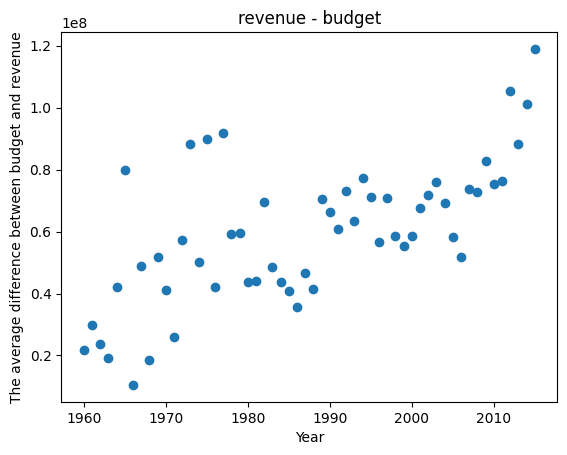

In [51]:
# Draw visualizations
plt.scatter(ratio_df['release_year'], ratio_df['ratio'])
plt.title('revenue - budget')
plt.xlabel('Year')
plt.ylabel('The average difference between budget and revenue')

# Evaluates:
 - The biggest difference in one year is almost equal 4e7
 - In the recent years, the disparity has become larger
 - Around 1970-1980, in general this ratio is quite low. But have a times, this more than 3.5e7.
    

<a id='conclusions'></a>
## Conclusions
•   The average time is almost 2 hours. It's been a pretty good time for movies.
•	After 1995s, the film industry was the most developed (Because the budget was very high and the difference between revenue and budget was also high).
•	 In general, the film industry has markedly developed. It also brings more profit (based on the difference between revenue and budget) – because of the slope of the graph to the left.
•	The number of movies is increasing day by day.
•	The budget has slowed down in recent years but it's still at a high. 
Shortcomings/factors limiting this analysis:
•	This analysis points to the number of movies per year but doesn’t care about the average budget for each movie.
•	This analysis doesn’t care about the genres of movies, It’s also important part that  affects the revenue.



In [52]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

1